# Assignment 1

In [13]:
import time

class Timer:    
    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.interval = self.end - self.start

In [11]:
import numpy as np

def diffusion_iteration(N):
    
    un = np.zeros((N, N), dtype='float64')
    un[1, 1:N-1] = 1
    un_1 = np.empty((N,N), dtype = 'float64')
    for i in range(1, N-1):
        for j in range(1, N-1):
            un_1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    np.copyto(un,un_1)
    return un        


for array_size in range(100, 1100, 100):
    with Timer() as t:
        diffusion_iteration(array_size)
    print("array size: {}".format(array_size),"| time for process: {0}".format(t.interval))

array size: 100 | time for process: 0.023919105529785156
array size: 200 | time for process: 0.08933210372924805
array size: 300 | time for process: 0.21627092361450195
array size: 400 | time for process: 0.418898344039917
array size: 500 | time for process: 0.6597528457641602
array size: 600 | time for process: 0.855238676071167
array size: 700 | time for process: 1.1430346965789795
array size: 800 | time for process: 1.4632527828216553
array size: 900 | time for process: 1.804856777191162
array size: 1000 | time for process: 2.1560637950897217


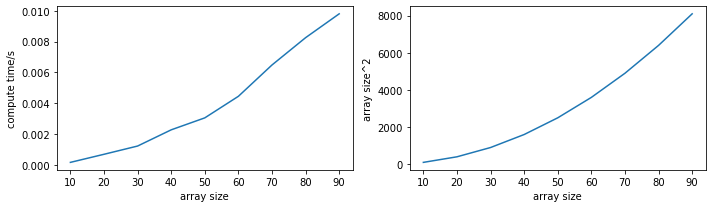

In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def diffusion_iteration(un, N):
    
    un1 = np.empty_like(un)
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1        
    return un

x = []
y = []


for array_size in range(10,100,10):
    
    u0 = np.zeros((array_size, array_size), dtype='float64')
    u0[int(array_size/2)-1:int(array_size/2)+1, int(array_size/2)-1:int(array_size/2)+1] = 1
    mean_arr = np.empty(5)
    
    for iteration in range(0,5):
        with Timer() as t:
            diffusion_iteration(u0, array_size)
        mean_arr[iteration] = t.interval

    x.append(array_size)
    y.append(np.mean(mean_arr))

fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

axes1.set_ylabel("compute time/s")
axes1.set_xlabel("array size")
axes1.plot(x, y)

axes2.set_ylabel("array size^2")
axes2.set_xlabel("array size")
axes2.plot(x,np.square(x))

fig.tight_layout()

plt.show()

In [ ]:
import numpy as np

def diffusion_iteration(un, un1):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return np.around(un, 3)
    

N = 10
u0 = np.zeros([N, N], dtype = 'float64')
u0[int(N/2)-2:int(N/2)+2, int(N/2)-2:int(N/2)+2] = 1
u1 = np.empty([N, N], dtype = 'float64')

for interations in range(0,3):
    print(diffusion_iteration(u0, u1))

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import numba

@numba.njit(parallel = False)
def diffusion_iteration_jit(un, N):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    return un

@numba.njit(parallel = True)
def diffusion_iteration_jit_p(un, N):
    for i in numba.prange(1, N-1):
        for j in range(1, N-1):
            un[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    return un

array_size = 5000

u0 = np.zeros([array_size, array_size], dtype = 'float64')

diffusion_iteration_jit(u0, array_size)
diffusion_iteration_jit_p(u0, array_size)

with Timer() as t:
    for iteration in range(0,10):
        diffusion_iteration_jit(u0, array_size)
a = t.interval
print("array size: {}".format(array_size),"| time for process: {0}".format(t.interval))
    
with Timer() as t:
    for iteration in range(0,10):
        diffusion_iteration_jit_p(u0, array_size)
b = t.interval
print("array size: {}".format(array_size),"| time for process: {0}".format(t.interval))

print(a/b)

array size: 5000 | time for process: 0.41078925132751465
array size: 5000 | time for process: 0.2613658905029297
1.5717018411892199


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange

@njit(parallel = False)
def diffusion_iteration_jit(un, un1, N):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return un

@njit(parallel = True)
def diffusion_iteration_jit_p(un, un1, N):
    for i in prange(1, N-1):
        for j in range(1, N-1):
            un1[i+1, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return un

array_size = 10000

u0 = np.zeros([array_size, array_size], dtype = 'float64')
u1 = np.empty_like(u0)
u0[int(array_size/2)-1:int(array_size/2)+1, int(array_size/2)-1:int(array_size/2)+1] = 1


diffusion_iteration_jit(u0, u1, array_size)
diffusion_iteration_jit_p(u0, u1, array_size)

with Timer() as t:
    diffusion_iteration_jit(u0, u1, array_size)
a = t.interval
print("array size: {}".format(array_size),"| time for process: {0}".format(t.interval))
    
with Timer() as t:
    diffusion_iteration_jit_p(u0, u1, array_size)
b = t.interval
print("array size: {}".format(array_size),"| time for process: {0}".format(t.interval))

print(a/b)

array size: 10000 | time for process: 0.2837028503417969
array size: 10000 | time for process: 0.2606949806213379
1.0882558983898434


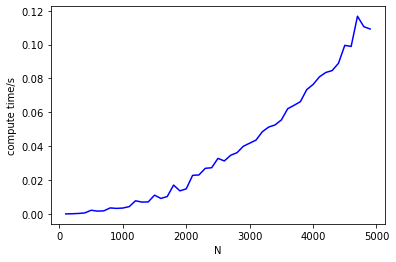

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numba

@numba.njit(['float64[:,:](float64[:,:], int32)'])
def diffusion_iteration_jit_p(un, N):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    return un

xjit_p = []
yjit_p = []

array_size = 10
u0 = np.zeros([array_size, array_size], dtype = 'float64')
diffusion_iteration_jit_p(u0, array_size)

for array_size in range(100,5000,100):
    
    u0 = np.zeros([array_size, array_size], dtype = 'float64')
    u0[int(array_size/2)-1:int(array_size/2)+1, int(array_size/2)-1:int(array_size/2)+1] = 1
    
    with Timer() as t:
        diffusion_iteration_jit_p(u0, array_size)
    xjit_p.append(array_size)
    yjit_p.append(t.interval)
    
plt.plot(xjit_p, yjit_p, 'b-')
plt.xlabel('N')
plt.ylabel('compute time/s')

plt.show()

In [3]:
len(range(0,10))

10

In [4]:
x = range(6)
for n in x:
  print(n) 


0
1
2
3
4
5


In [4]:
print(np.empty(5))

[0.   0.25 0.5  0.75 1.  ]


<IPython.core.display.Javascript object>


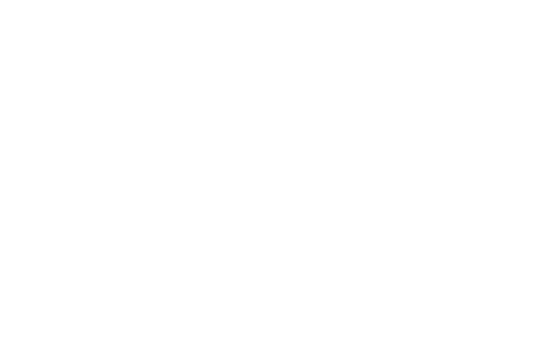

<IPython.core.display.Javascript object>


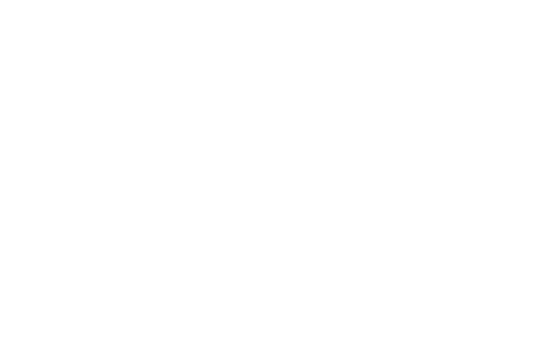

In [5]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()